### Coding Grover's algorithm with matrices

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile

from qiskit.visualization import plot_histogram

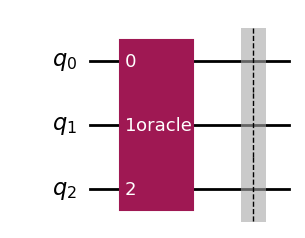

In [5]:
oracle_matrix = [
    [1, 0,  0, 0, 0, 0, 0, 0],
    [0, 1,  0, 0, 0, 0, 0, 0],
    [0, 0,  1, 0, 0, 0, 0, 0],
    [0, 0,  0, 1, 0, 0, 0, 0],
    [0, 0,  0, 0, -1, 0, 0, 0],
    [0, 0,  0, 0, 0, 1, 0, 0],
    [0, 0,  0, 0, 0, 0, 1, 0],
    [0, 0,  0, 0, 0, 0, 0, 1]
]
oracle = QuantumCircuit(3)
oracle.unitary(oracle_matrix, qubits=[0, 1, 2], label='oracle')
oracle.barrier()
display(oracle.draw('mpl'))

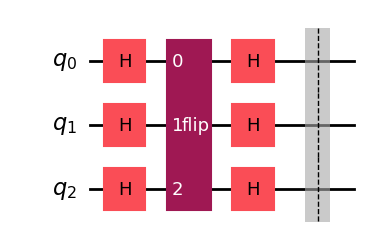

In [6]:
flip_matrix = [
    [-1, 0, 0, 0, 0, 0, 0, 0],
    [ 0, 1, 0, 0, 0, 0, 0, 0],
    [ 0, 0, 1, 0, 0, 0, 0, 0],
    [ 0, 0, 0, 1, 0, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 0, 1, 0, 0],
    [ 0, 0, 0, 0, 0, 0, 1, 0],
    [ 0, 0, 0, 0, 0, 0, 0, 1]
]
flip = QuantumCircuit(3)
flip.unitary(flip_matrix, qubits=[0, 1, 2], label='flip')
h3 = QuantumCircuit(3)
h3.h([0, 1, 2])

diffuser = h3.compose(flip).compose(h3)
diffuser.barrier()
display(diffuser.draw('mpl'))

In [7]:
grover_iterate = oracle.compose(diffuser)

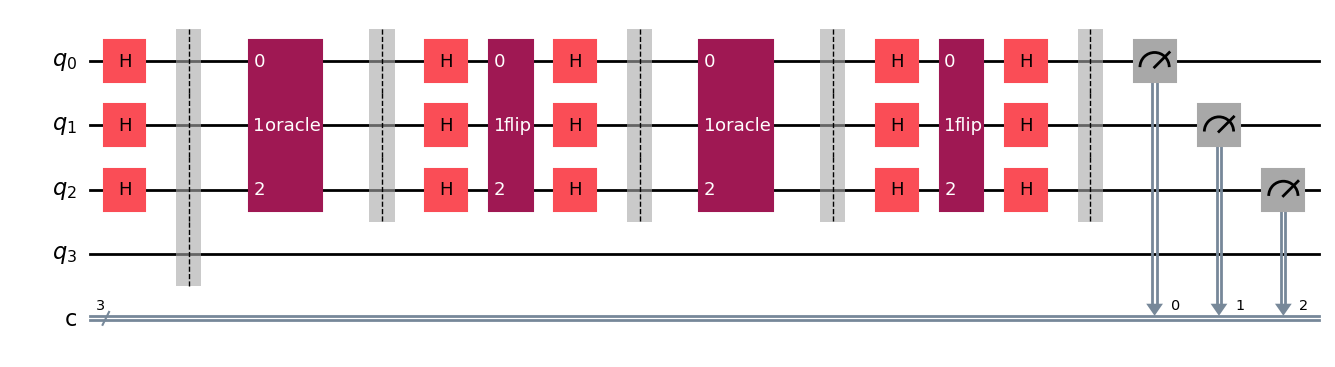

In [8]:
circ = QuantumCircuit(4, 3) # We use the fourth qubit
                            #    later in this chapter.
circ.h([0, 1, 2])
circ.barrier()
circ = circ.compose(grover_iterate).compose(grover_iterate)
circ.measure([0, 1, 2], [0, 1, 2])                         
display(circ.draw('mpl'))

9ccac9a7-c239-4df8-8eac-88bfc8939fb3
{'110': 3, '100': 949, '001': 10, '011': 7, '111': 6, '101': 11, '000': 6, '010': 8}


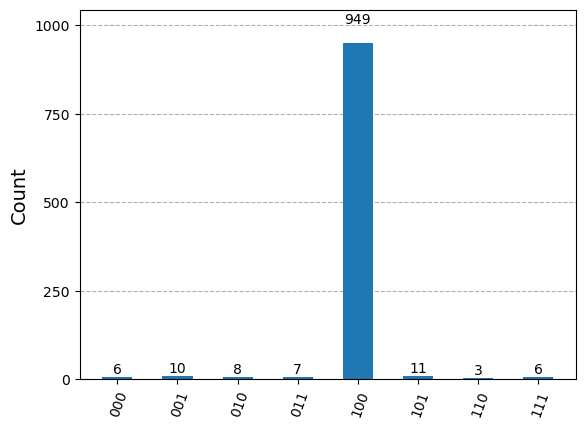

In [9]:
device = Aer.get_backend('qasm_simulator') 
qc_transpiled = transpile(circ, backend=device)
shots=1000

job = device.run(qc_transpiled, shots=shots, memory=True)

print(job.job_id())

result = job.result()
counts = result.get_counts(circ)

print(counts)
display(plot_histogram(counts))

### When to use Grover's algorithm

In [10]:
x = float(input())
if x**5 - 2*(x**4) + 4*(x**3) - 8*(x**2) + 3*x - 6 == 0:
    print(1)
else:
    print(-1)

### Coding Grover's algorithm with high-level functions

In [ ]:
pip install tweedledum

In [ ]:
pip install qiskit_algorithms

In [ ]:
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.tools.visualization import plot_histogram

In [ ]:
expression = ('(sausage & ~anchovies & pineapple)' \
              ' & (mushrooms | anchovies)')
print(expression)

oracle = PhaseOracle(expression)
problem = AmplificationProblem(oracle)
grover = Grover(iterations=2) 
circ = grover.construct_circuit(problem)
circ.measure_all()
display(circ.draw('mpl'))

In [ ]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

device = Aer.get_backend('qasm_simulator') 

job = execute(circ,backend = device, shots = 1000)
print(job.job_id())

result = job.result()
counts = result.get_counts(circ)

print(counts)
display(plot_histogram(counts))

### Coding Grover's algorithm with quantum gates

In [ ]:
from qiskit.circuit.library.standard_gates import XGate

In [ ]:
oracle = QuantumCircuit(4)
oracle.x(3)
oracle.h(3)

ctrl = XGate().control(3, ctrl_state='100')
oracle.append(ctrl, qargs=[0, 1, 2, 3])

oracle.barrier()
display(oracle.draw('mpl'))

In [ ]:
diffuser = QuantumCircuit(4)
diffuser.h([0, 1, 2]) 

ctrl =  XGate().control(3, ctrl_state='000')
diffuser.append(ctrl, qargs=[0, 1, 2, 3])

diffuser.h([0, 1, 2])

diffuser.barrier()
display(diffuser.draw('mpl'))

### Question 3

In [ ]:
import random

oracle_matrix = [
    [1, 0,  0, 0, 0, 0, 0, 0],
    [0, 1,  0, 0, 0, 0, 0, 0],
    [0, 0,  1, 0, 0, 0, 0, 0],
    [0, 0,  0, 1, 0, 0, 0, 0],
    [0, 0,  0, 0, 1, 0, 0, 0],
    [0, 0,  0, 0, 0, 1, 0, 0],
    [0, 0,  0, 0, 0, 0, 1, 0],
    [0, 0,  0, 0, 0, 0, 0, 1]
]

entry = random.randint(0, 7)
print(entry)
oracle_matrix[entry][entry] = -1

oracle = QuantumCircuit(3)
oracle.unitary(oracle_matrix, qubits=[0, 1, 2], label='oracle')
oracle.barrier()
display(oracle.draw('mpl'))

### Question 7

In [ ]:
# ((m | t) &  ~n) &   ((t | n)  & ~m)
# (~~(m | t)  & ~n) & (~~(t | n)  & ~m)
# (~(~m & ~t) & ~n) & (~(~t & ~n) & ~m)

from qiskit import QuantumRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates import XGate 

m = QuantumRegister(1, 'm')
t = QuantumRegister(1, 't')
n = QuantumRegister(1, 'n')
mt = QuantumRegister(1, 'not m and not t')
mtn = QuantumRegister(1, 'alice')
tn = QuantumRegister(1, 'not t and not n')
tnm = QuantumRegister(1, 'bob')
exp = QuantumRegister(1, 'alice and bob')
circ = QuantumCircuit(m, t, n, mt, mtn, tn, tnm, exp)

circ.h([0, 1, 2])

ctrl = XGate().control(2, ctrl_state='00')
circ.append(ctrl, qargs=[0, 1, 3])
circ.append(ctrl, qargs=[2, 3, 4])
circ.append(ctrl, qargs=[1, 2, 5])
circ.append(ctrl, qargs=[0, 5, 6])

circ.append(ctrl, qargs=[4, 6, 7])

circ.append(ctrl, qargs=[0, 5, 6])
circ.append(ctrl, qargs=[1, 2, 5])
circ.append(ctrl, qargs=[2, 3, 4])
circ.append(ctrl, qargs=[0, 1, 3])

circ.h([0, 1, 2])

display(circ.draw('mpl'))